# **Predicting Usage of a Video Game Research Server**

Emma Chow | 65533713

In [7]:
#Run this first
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
set.seed(42)

In [8]:
#Loading the data
players_data <- read_csv("https://raw.githubusercontent.com/emma-chow/Group-Project/refs/heads/main/players.csv") 
glimpse(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


## **Description of datasets - players dataset**

#### Variable description
- Number of variables: 7

| Name of variable | Type | Description |
|----------------- | ---- | ----------- |
| experience | chr | The self-reported level of experience of each player |
| subscribe | lgl | The player's subscription status to a game-related newsletter |
| hashedEmail | chr | The hashed email addresses of each player to identify players without revealing their contact information| 
| played_hours | dbl | The numbers of hours players were playing the game |
| name | chr | The names of each of the players | 
| gender | chr | The gender that each player identifies by | 
| Age | dbl | The age of each player in years |

#### Issues with the dataset
- There are missing values in the dataset
    - This leads to error messages when using many of the functions required for data analysis, such as when producing summary statistics. 
    - As shown below, there are few missing values in the data set. This means that in order to tidy the data, the NAs can be removed without biasing the data.  

In [9]:
#Determining the number of missing values in the dataset by column
players_missing <- players_data |> 
    sapply(function(x) sum(is.na(x)))
players_missing

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

#### Issues with data collection

- All the data gathered was self-reported, which indicates that the data suffers participant bias.
    - The players may have incorrectly reported their age
    - Additionally, although making the players report their name and their emails makes it easy to identify them, this may lead to inaccurate self-reporting due to social desirability bias. They may be inclined to exaggerate their experience or falsely report their subscription status as these variables are indicative of the player's skill. 

#### Preliminary information
- Number of observations: 196 
    - The data is already somewhat tidy, meaning that each row only contains one observation. Hence, the number of observations is indicated by the number of rows.
>
- Summary statistics
    - The summary() function was used to produce a summary of the data, which is presented below.
    - For double variables, the summary shows that the mean hours played is 5.846 hours and the mean age is 20.52 years old. 
    - For the character variables, no summary statistics were produced.
    - For the logical variable, subscribe, the number of trues and falses were counted. This showed that around a quarter of people were not subscribed to a newsletter. 

In [10]:
#Producing a summary of the players dataset
players_summary <- players_data |>
    summary()
players_summary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

## **Questions**

**Broad question**: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific question**: Can player age and subscription status to a gaming newsletter accurately predict whether the player is a low-hour, medium-hour or high-hour player? 
>
The players dataset will be used to address this question, where the variables "Age" and "subscription" will be the exploratory variables and "played_hours" will be the response variable. To perform this analysis, I would need to select the columns associated with the variables. Then, I would turn played_hours into a categorical variable with the categories low-hour, medium-hour and high-hour player using the mutate function and name the new variable player engagement level. Finally, I would use a classification to determine whether age and subscription status can predict player's engagement level through the number of hours they play the game for. 

## **Exploratory Data Analysis**

#### Tidying the data
- With the dataset already loaded above, I can now tidy the data. As identified above, there are few missing values in the dataset, meaning that these observations should be removed in order to tidy the data. 

In [11]:
#Removing the observations that have missing values
players <- players_data |>
    drop_na()
glimpse(players)

Rows: 194
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


#### Summarizing the data 
- The next step in exploring the data is to compute the mean for the number of hours played and the age of the players. As the NAs have been removed, this is now possible. 

In [12]:
#Finding the mean of the quantitative values in the players dataset
players_mean <- players |>
    summarise(played_hours_mean = mean(played_hours), age_mean = mean(Age))
players_mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.904639,20.52062


#### Exploratory visualisations

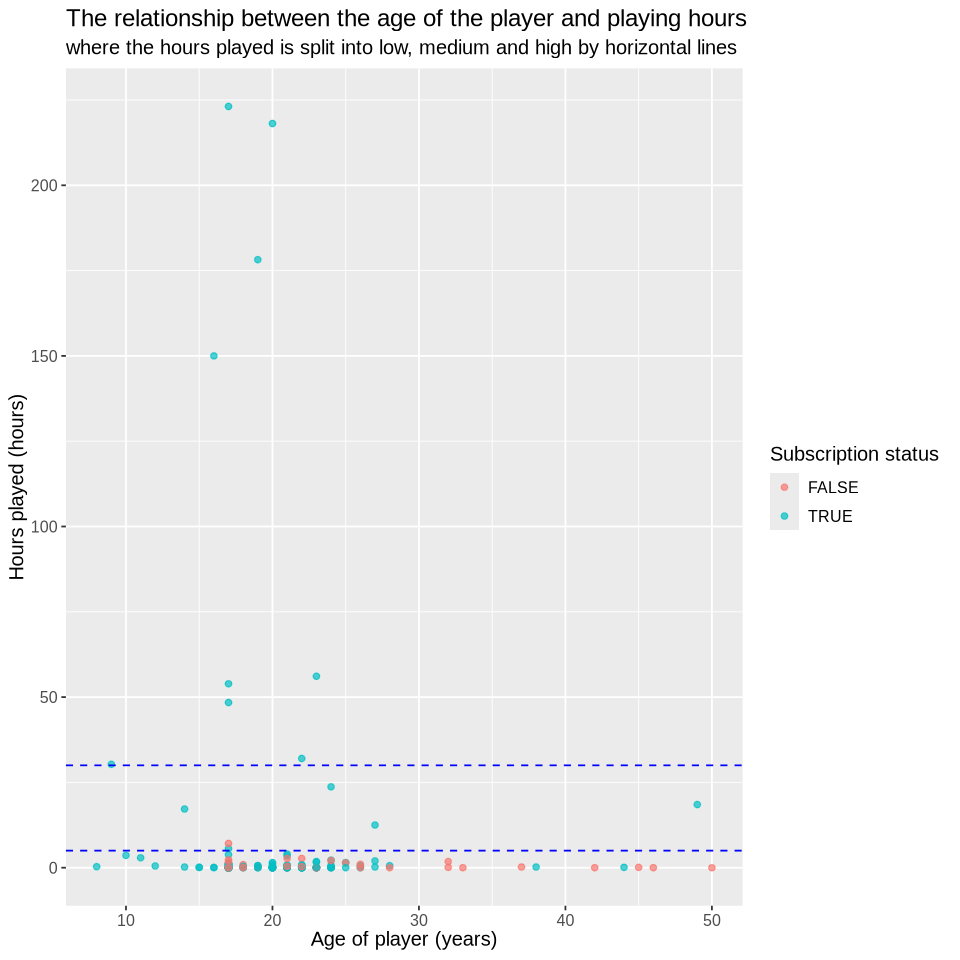

In [18]:
options(repr.plot.height = 8, repr.plot.width = 8)
plot_1 <- players |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.7) +
    geom_hline(yintercept = 5, linetype = "dashed", colour = "blue") +
    geom_hline(yintercept = 30, linetype = "dashed", colour = "blue") +
    labs(x = "Age of player (years)", y = "Hours played (hours)", 
         colour = "Subscription status",
         title = "The relationship between the age of the player and playing hours", 
         subtitle = "where the hours played is split into low, medium and high by horizontal lines") +
    theme(text = element_text(size = 12))
plot_1

This plot shows that there is no relationship between the age of the player and the number of hours played when hours played is considered a continuous variable. However, the horizontal lines, which represent a potential way to quantify low (0-5 hours), medium (5-30 hours) and high (>30 hours) hours played, suggest that a younger age may be correlated with high playing hours. This reveals that the data will likely be able to predict engagement level using age, however, this does not suggest much about how accurately it can do this. Furthermore, it appears that there may be a relationship between player age and subscription status, where younger player age may be indicative of being subscribed to a game-related newsletter. This is seen from blue points, which represent that the player is subscribed to a game-related newsletter, are consolidated on the left side of the graph. 

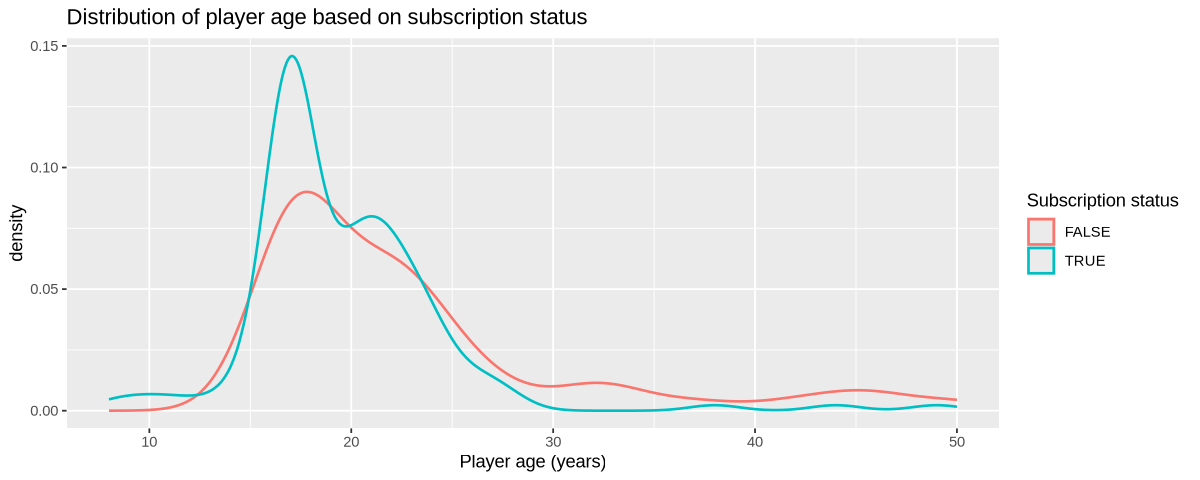

In [19]:
options(repr.plot.height = 4, repr.plot.width = 10)
plot_2 <- players |>
    ggplot(aes(x = Age, colour = subscribe)) +
    geom_density(alpha = 0.2, linewidth = 0.75) + 
    labs(x = "Player age (years)", 
         colour = "Subscription status", 
         title = "Distribution of player age based on subscription status") +
    theme(element_text(size = 10))
plot_2

This plot was created so that further analysis can be done on the potential relationship between age and subscription status. This plot suggests that there is a weak relationship between player age and subscription status. Although there is an overlap of the plots, the distribution of the not subscribed plot (red) is much wider, suggesting that as the players get older, they are less likely to be subscribed to a game-related newsletter. Furthermore, the distribution of the subscribed plot (blue) peaks around age 18-22, suggesting that the majority of players who are subscribed to a game-related newsletter are younger. This relationship suggests that player age and subscription status could be good indicators of the player's engagement levels. 

## **Methods and plan**

The goal of this project is to create a classification model that is able to predict player's engagement levels based on their age and subscription status to a game-related newsletter. 

The players.csv data set will be used to create this classification model. Because the research question only requires data from the three variables "subscribe", "played_hours" and "Age", these columns can be selected to create a new dataset using the select() function. Then, the mutate() function will be used on the played_hours variable to split the played hours into low, medium and high. The new column will be named "engagement_level". 

Next, the data will be split into training and testing in a 70/30 split, where the strata is engagement_level. The training set will then be split using a 5-fold cross validation to determine the optimal number of neighbours ($k$) to use. The model will be made using the K-nearest neighbours classification algorithm with the training set. This is an appropriate model because it doesn't assume that there is a relationship between the predictors and the target variable. However, a limitation of using the K-nearest neighbours algorithm is that because the classes (low, medium, high hours played) are imbalanced, its predictive power may be limited. A key assumption made when using this model is that the distance between two points is directly associated with their level of relation to each other. 

Using the model, I will be able to determine whether player age and subscription status can predict player engagement level using the test set. The accuracy of this prediction will be calculated from a confusion matrix, which will give the number of positive predictions and the total number of predictions.  